In [3]:
# set up
%pylab
%pylab inline
%matplotlib inline
%load_ext autoreload
%autoreload 2
from PIL import Image
from tqdm import tqdm
from sklearn.metrics import pairwise_distances

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib
Populating the interactive namespace from numpy and matplotlib


In [74]:
def is_sad(rgb_pixel, threshhold=10):
    R, G, B = map(int, rgb_pixel)
    diff1 = np.abs(R - G)
    diff2 = np.abs(G - B)
    diff3 = np.abs(R - B)
    return  diff1 < threshhold \
            and diff2 < threshhold \
            and diff3 < threshhold

In [121]:
def colorize(color1, color2):
    c = np.array(color1) + 2 * np.array(color2)
    c = c.astype(float)
    c *= (np.max(color1) / np.max(c))
    return c.astype(int)

In [122]:
def make_happy(img, threshhold=10):
    img_arr = np.array(img)
    N, M = img_arr.shape[:2]
    
    happy, sad = [], []
    for i in range(N):
        for j in range(M):
            if is_sad(img_arr[i][j], threshhold):
                sad.append([i, j])
            else:
                happy.append([i, j])
                
    happy, sad = np.array(happy), np.array(sad)
    
    dist = pairwise_distances(happy, sad)
    best = np.argmin(dist, axis=0)

    for i in range(len(sad)):
        x, y = sad[i]
        z, w = happy[best[i]]
        img_arr[x][y] = colorize(img_arr[x][y], img_arr[z][w])           
           
    return img_arr


def mark_grey(img, threshhold=10):
    img_arr = np.array(img)
    X = img_arr.reshape(-1, img_arr.shape[-1])
    for i, pixel in enumerate(X):
        if is_sad(pixel, threshhold):
            X[i] = np.array([255, 0, 0])
    return X.reshape(img_arr.shape)


def make_sad(img, threshhold=10):
    img_arr = np.array(img)
    X = img_arr.reshape(-1, img_arr.shape[-1])
    
    for i, pixel in enumerate(X):
        if not is_sad(pixel, threshhold):
            R, G, B = map(int, pixel)
            avg = (0.3 * R) + (0.59 * G) + (0.11 * B)
            X[i] = np.array([avg, avg, avg])
            
    return X.reshape(img_arr.shape)

In [123]:
def show_images(img, threshhold=10):
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(12,12))
    grey_image = mark_grey(img.copy(), threshhold)
    sad_image = make_sad(img.copy(), threshhold)
    happy_image = make_happy(img.copy(), threshhold)
    
    ax1.imshow(img)
    ax1.set_title('Original Image')
    
    ax2.imshow(grey_image)
    ax2.set_title(f'Mark greys')
    
    ax3.imshow(sad_image)
    ax3.set_title(f'Sad image')
    
    ax4.imshow(happy_image)
    ax4.set_title(f'Happy image')

In [124]:
Images = [Image.open('Images/1.jpg'),
          Image.open('Images/2.jpg'),
          Image.open('Images/3.jpg'),
          Image.open('Images/4.jpg'),
          Image.open('Images/5.jpg'),
          Image.open('Images/6.jpg'),
         ]  

Marking grey colours: 100%|██████████████████████████████████████████████████████████████| 6/6 [00:08<00:00,  1.45s/it]


Wall time: 8.72 s


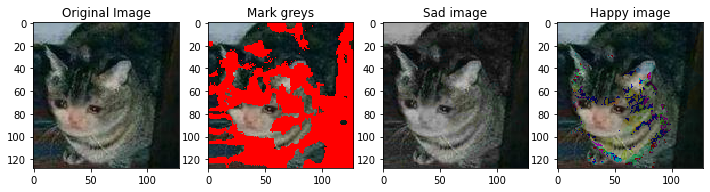

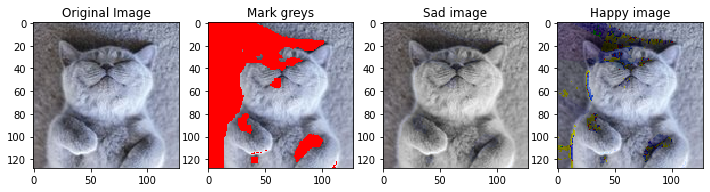

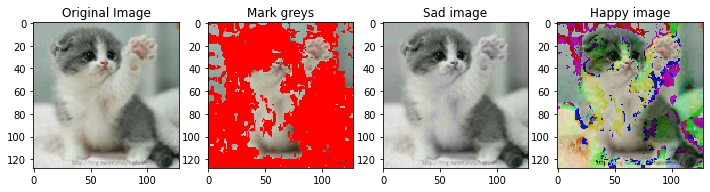

In [ ]:
%%time
for img in tqdm(Images, desc='Marking grey colours', position=0, leave=True):
    show_images(img, threshhold=15)